# Linear Discriminant Analysis

## 1 - Packages ##

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

## 2 - Setup data

In [2]:
X1 = np.asarray([[2, 1],
                [1, 0],
                [1, 5],
                [4, 8]])
X2 = np.asarray([[-1, 0],
                 [-1, 1],
                 [-3, 1],
                 [-5, 2]])

In [4]:
X1 = np.asarray([[0,2],
                [0,1],
                [1,0]])
X2 = np.asarray([[-1, 0],
                 [0, -3]])

In [234]:
X = np.concatenate([X1, X2], axis = 0)

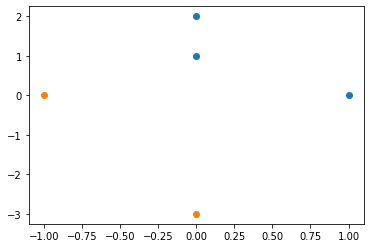

In [5]:
# Show results in the plot
plt.scatter(X1[:, 0], X1[:, 1])
plt.scatter(X2[:, 0], X2[:, 1])
plt.show()

## 3 -  Linear Discriminant Analysis

### 3.1 -  Mean vector and Covariance matrix

In [20]:
def covariance(X):
    """
    Calculates mean and covariance matrix for one class

    Arguments:
    X -- input matrix with shape (n_examples, n_features) 

    Returnes:
    mean vector
    covariance matrix with shape (n_features, n_features)
    """
    n = X.shape[0]
    m = X.mean(axis=0)
    Y = X.copy() - m
    S = np.dot(np.transpose(Y), Y)
    
    return m, S

def covariance_classes(Xs):
    """
    Calculates covariance matrix for several class
    Xs -- list of normalized input matrix with shape (n_examples, n_features) 

    Returnes:
    united covariance matrix
    """
    ms = []
    Ss = []
    for X in Xs:
        m, S = covariance(X)
        ms.append(m)
        Ss.append(S)
    return ms, np.sum(Ss, axis=0)
        

In [235]:
class LDA():
    """
    Parameters:
    -----------
    Xs -- list of matrix of input features of shape (n_examples, n_features) 
    """
    
    def __init__(self, Xs):
        self.Xs = Xs
        self.X = np.concatenate(self.Xs, axis = 0) # All data points
        self.Y = None # Transformed data points
        self.w = None # w vector
        self.S = None # Covariance matrix
        self.ms = None # mean vector
        
    def transform(self):
        """
        Transforms the samples into the new subspace
        
        Returns:
        transformed -- reduced matrix of input features with shape (n_samples, n)
        """
        ms, self.S = covariance_classes(self.Xs)
        self.w = (np.linalg.inv(self.S) @ (ms[0] - ms[1])).reshape(1, -1)
        norm = np.linalg.norm(w)
        self.w = w / norm
        self.Y = self.X @ self.w.T

        return self.Y, self.w
    
    def restore(self):
        """
        Restores "original" values

        Returns:
        matrix with shape (n_features, n_examples), 
            containing restored values depending on reduced input matrix of features   
        """
        #v = self.w[0]
        #print(np.dot(v, v))
        #X_norm = []
        #for u in self.X:
        #    X_norm.append(np.dot(u, v)*v)
        X_norm = self.Y * self.w
        return X_norm


In [236]:
model = LDA([X1, X2])
Y, w = model.transform()

In [237]:
new_X = model.restore()

In [238]:
new_X

array([[ 0.72413793,  0.31034483],
       [ 0.36206897,  0.15517241],
       [ 0.84482759,  0.36206897],
       [-0.84482759, -0.36206897],
       [-1.0862069 , -0.46551724]])

Visualising of initial and restored values:

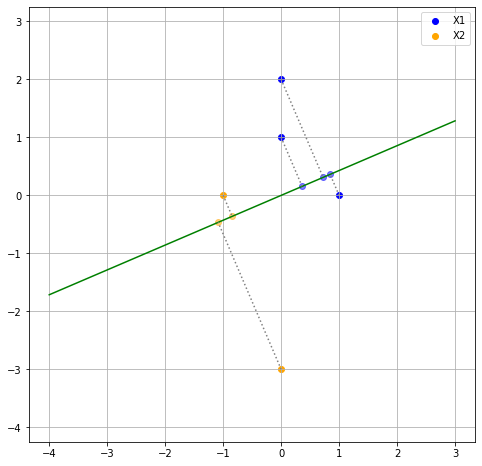

In [246]:
figure(figsize=(8,8))
plt.scatter(X1[:, 0], X1[:, 1], color='blue', label='X1')
plt.scatter(X2[:, 0], X2[:, 1], color='orange', label='X2')
x = np.arange(-4, 4)
y = w[0][1] * x / w[0][0]
plt.plot(x, y, color = "green")
plt.scatter(new_X[0:len(X1), 0], new_X[0:len(X1), 1], color='blue', alpha=0.5)
plt.scatter(new_X[len(X1):, 0], new_X[len(X1):, 1], color='orange', alpha=0.5)
for p1, p2 in zip(X, new_X):
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], ':', color='gray')
plt.legend()
plt.axis('equal')
plt.grid()
plt.show()